# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [42]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

fatal: destination path 'Coursera-Content' already exists and is not an empty directory.


## Import necessary Libraries 

In [44]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [ ]:
# Create Directory for Training Data

os.mkdir("/content/Crop-Brain-MRI")
os.mkdir("/content/Crop-Brain-MRI/glioma_tumor")
os.mkdir("/content/Crop-Brain-MRI/meningioma_tumor")
os.mkdir("/content/Crop-Brain-MRI/no_tumor")
os.mkdir("/content/Crop-Brain-MRI/pituitary_tumor")

In [ ]:
# Create Directory for Testing Data

os.mkdir("/content/Test-Data-MRI")
os.mkdir("/content/Test-Data-MRI/glioma_tumor")
os.mkdir("/content/Test-Data-MRI/meningioma_tumor")
os.mkdir("/content/Test-Data-MRI/no_tumor")
os.mkdir("/content/Test-Data-MRI/pituitary_tumor")

## Data Visualization

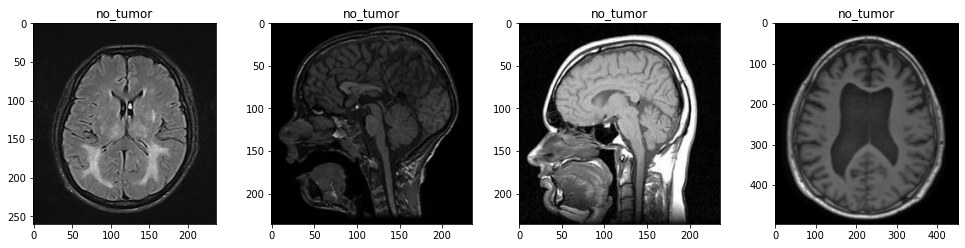

In [50]:
train_dir = "/content/Coursera-Content/Brain-MRI/Training/"
test_dir = "/content/Coursera-Content/Brain-MRI/Testing/"
classes = os.listdir("/content/Coursera-Content/Brain-MRI/Testing")
files_path_dict = {}

for c in classes:
  files_path_dict[c] = list(map(lambda x :train_dir+c+'/'+x, os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index = 0

for c in  classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

for i in range(1,5):
  index +=1
  plt.subplot(4, 4, index)
  plt.imshow(load_img(path_list[i]))
  plt.title(c)


## Create a Function to Crop Images

In [51]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


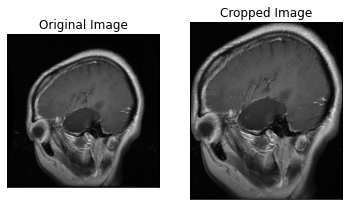

In [52]:
example_img = cv2.imread("/content/Coursera-Content/Brain-MRI/Training/glioma_tumor/gg (100).jpg")
copped_image = crop_image(example_img, plot=True)

## Saving The Cropped Images 

In [53]:
# Crop the Training Images and Save it to the Directory we previously cretaed
glioma = train_dir + "glioma_tumor"
meningioma = train_dir + "meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
   path = os.path.join(glioma, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Crop-Brain-MRI/glioma_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
   path = os.path.join(meningioma, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Crop-Brain-MRI/meningioma_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1     

 
j = 0
for i in tqdm(os.listdir(no_tumor)):
   path = os.path.join(no_tumor, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Crop-Brain-MRI/no_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1     


j = 0
for i in tqdm(os.listdir(pituitary)):
   path = os.path.join(pituitary, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Crop-Brain-MRI/pituitary_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1   

100%|██████████| 901/901 [00:05<00:00, 154.31it/s]


In [54]:
# Crop the Testing Images and Save it to the Directory we previously cretaed
# Crop the Training Images and Save it to the Directory we previously cretaed
test_glioma = test_dir + "glioma_tumor"
test_meningioma = test_dir + "meningioma_tumor"
test_no_tumor = test_dir + "no_tumor"
test_pituitary = test_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(test_glioma)):
   path = os.path.join(test_glioma, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Test-Data-MRI/glioma_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1

j = 0
for i in tqdm(os.listdir(test_meningioma)):
   path = os.path.join(test_meningioma, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Test-Data-MRI/meningioma_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1     

 
j = 0
for i in tqdm(os.listdir(test_no_tumor)):
   path = os.path.join(test_no_tumor, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Test-Data-MRI/no_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1     


j = 0
for i in tqdm(os.listdir(test_pituitary)):
   path = os.path.join(test_pituitary, i)
   img = cv2.imread(path)
   img = crop_image(img, plot=False)
   if img is not None:
     img = cv2.resize(img, (224,224))
     save_path = "/content/Test-Data-MRI/pituitary_tumor/" + str(j) + ".jpg"
     cv2.imwrite(save_path, img)
     j = j+1   

100%|██████████| 5/5 [00:00<00:00, 116.20it/s]


## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [55]:
# Use Image Data Generator to perform this task.

datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('/content/Crop-Brain-MRI/', 
                                        target_size = (224,224),
                                        batch_size= 32,
                                        class_mode= 'categorical',
                                        subset = 'training')
valib_data = datagen.flow_from_directory('/content/Crop-Brain-MRI/', 
                                        target_size = (224,224),
                                        batch_size = 32,
                                        class_mode = 'categorical',
                                        subset= 'validation')
test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory('/content/Test-Data-MRI/', 
                                        target_size = (224,224),
                                        class_mode = 'categorical',
                                       )

Found 2613 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [56]:
# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


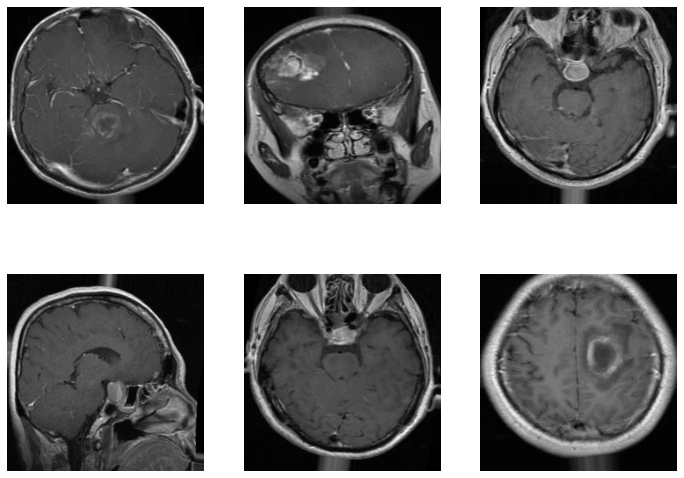

In [57]:
# View the augmented data.
sample_x, sample_y = next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2, 3, i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

## Build and Compile the Model 

In [58]:
# Build the Model
effnet = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= effnet.inputs, outputs= model)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [65]:
model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accruacy", patience=5, mode="auto", verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Model Training and Model Evaluation

In [67]:
# Train the model
history =model.fit(train_data, epochs=7, validation_data=valib_data, verbose=1, callbacks=[checkpoint, earlystop])


Epoch 1/7
82/82 [==============================] - 76s 782ms/step - loss: 0.1223 - accuracy: 0.9613 - val_loss: 0.2695 - val_accuracy: 0.9172

Epoch 00001: val_accuracy improved from -inf to 0.91718, saving model to model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/7
82/82 [==============================] - 63s 761ms/step - loss: 0.0978 - accuracy: 0.9705 - val_loss: 0.2336 - val_accuracy: 0.9141

Epoch 00002: val_accuracy did not improve from 0.91718
Epoch 3/7
82/82 [==============================] - 62s 759ms/step - loss: 0.0691 - accuracy: 0.9801 - val_loss: 0.2129 - val_accuracy: 0.9340

Epoch 00003: val_accuracy improved from 0.91718 to 0.93405, saving model to model.h5
Epoch 4/7
82/82 [==============================] - 63s 760ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.1811 - val_accuracy: 0.9479

Epoch 00004: val_accuracy improved from 0.93405 to 0.94785, saving model to model.h5
Epoch 5/7
82/82 [==============================] - 62s 757ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.1699 - val_accuracy: 0.9586

Epoch 00005: val_accuracy improved from 0.94785 to 0.95859, saving model to model.h5
Epoch 6/7
82/82 [==============================] - 63s 760ms/step - loss: 0.0418 - accuracy: 0.9870 - val_loss: 0.1437

In [ ]:
# Plot the training curves

In [ ]:
# Evaluate the model on Test Set

## Obtaining Predictions on Test Images

In [ ]:
# Obtain Predictions on Test Images